In [8]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive/")
pre_processed_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScienceLabs/200269J.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
# Provide the five number summary for Insulin, BMI and Age variable
pre_processed_dataset[['Insulin', 'BMI', 'Age']].describe().T.drop(columns=['count','mean','std'])

,min,25%,50%,75%,max
Insulin,0.0,0.000,36.0,107.5,310.0
BMI,18.2,27.525,32.0,36.3,50.0
Age,21.0,24.000,29.0,40.0,66.0


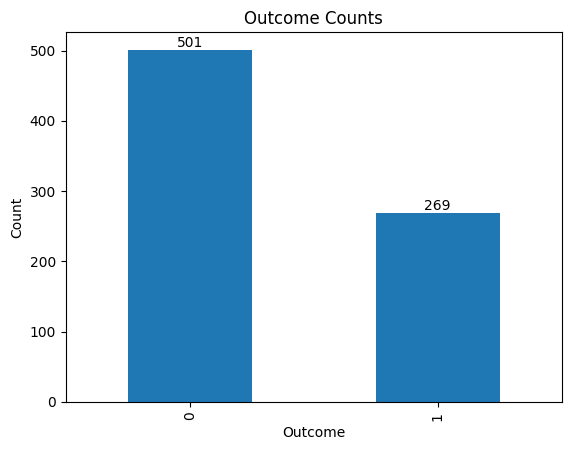

In [10]:
# Count the number of occurrences of each value in the Outcome variable
outcome_counts = pre_processed_dataset['Outcome'].value_counts()

# Plot the counts using a bar chart
ax = outcome_counts.plot(kind='bar')
plt.title('Outcome Counts')
plt.xlabel('Outcome')
plt.ylabel('Count')

# add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

In [11]:
pairwise_subset = pre_processed_dataset.drop(columns=['Patient_ID','Outcome'])
pairwise_subset

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,-1.0,137.0,40.0,35.0,168.0,43.1,0.371,33.0
...,...,...,...,...,...,...,...,...
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0
768,1.0,189.0,60.0,23.0,36.0,30.1,0.398,59.0


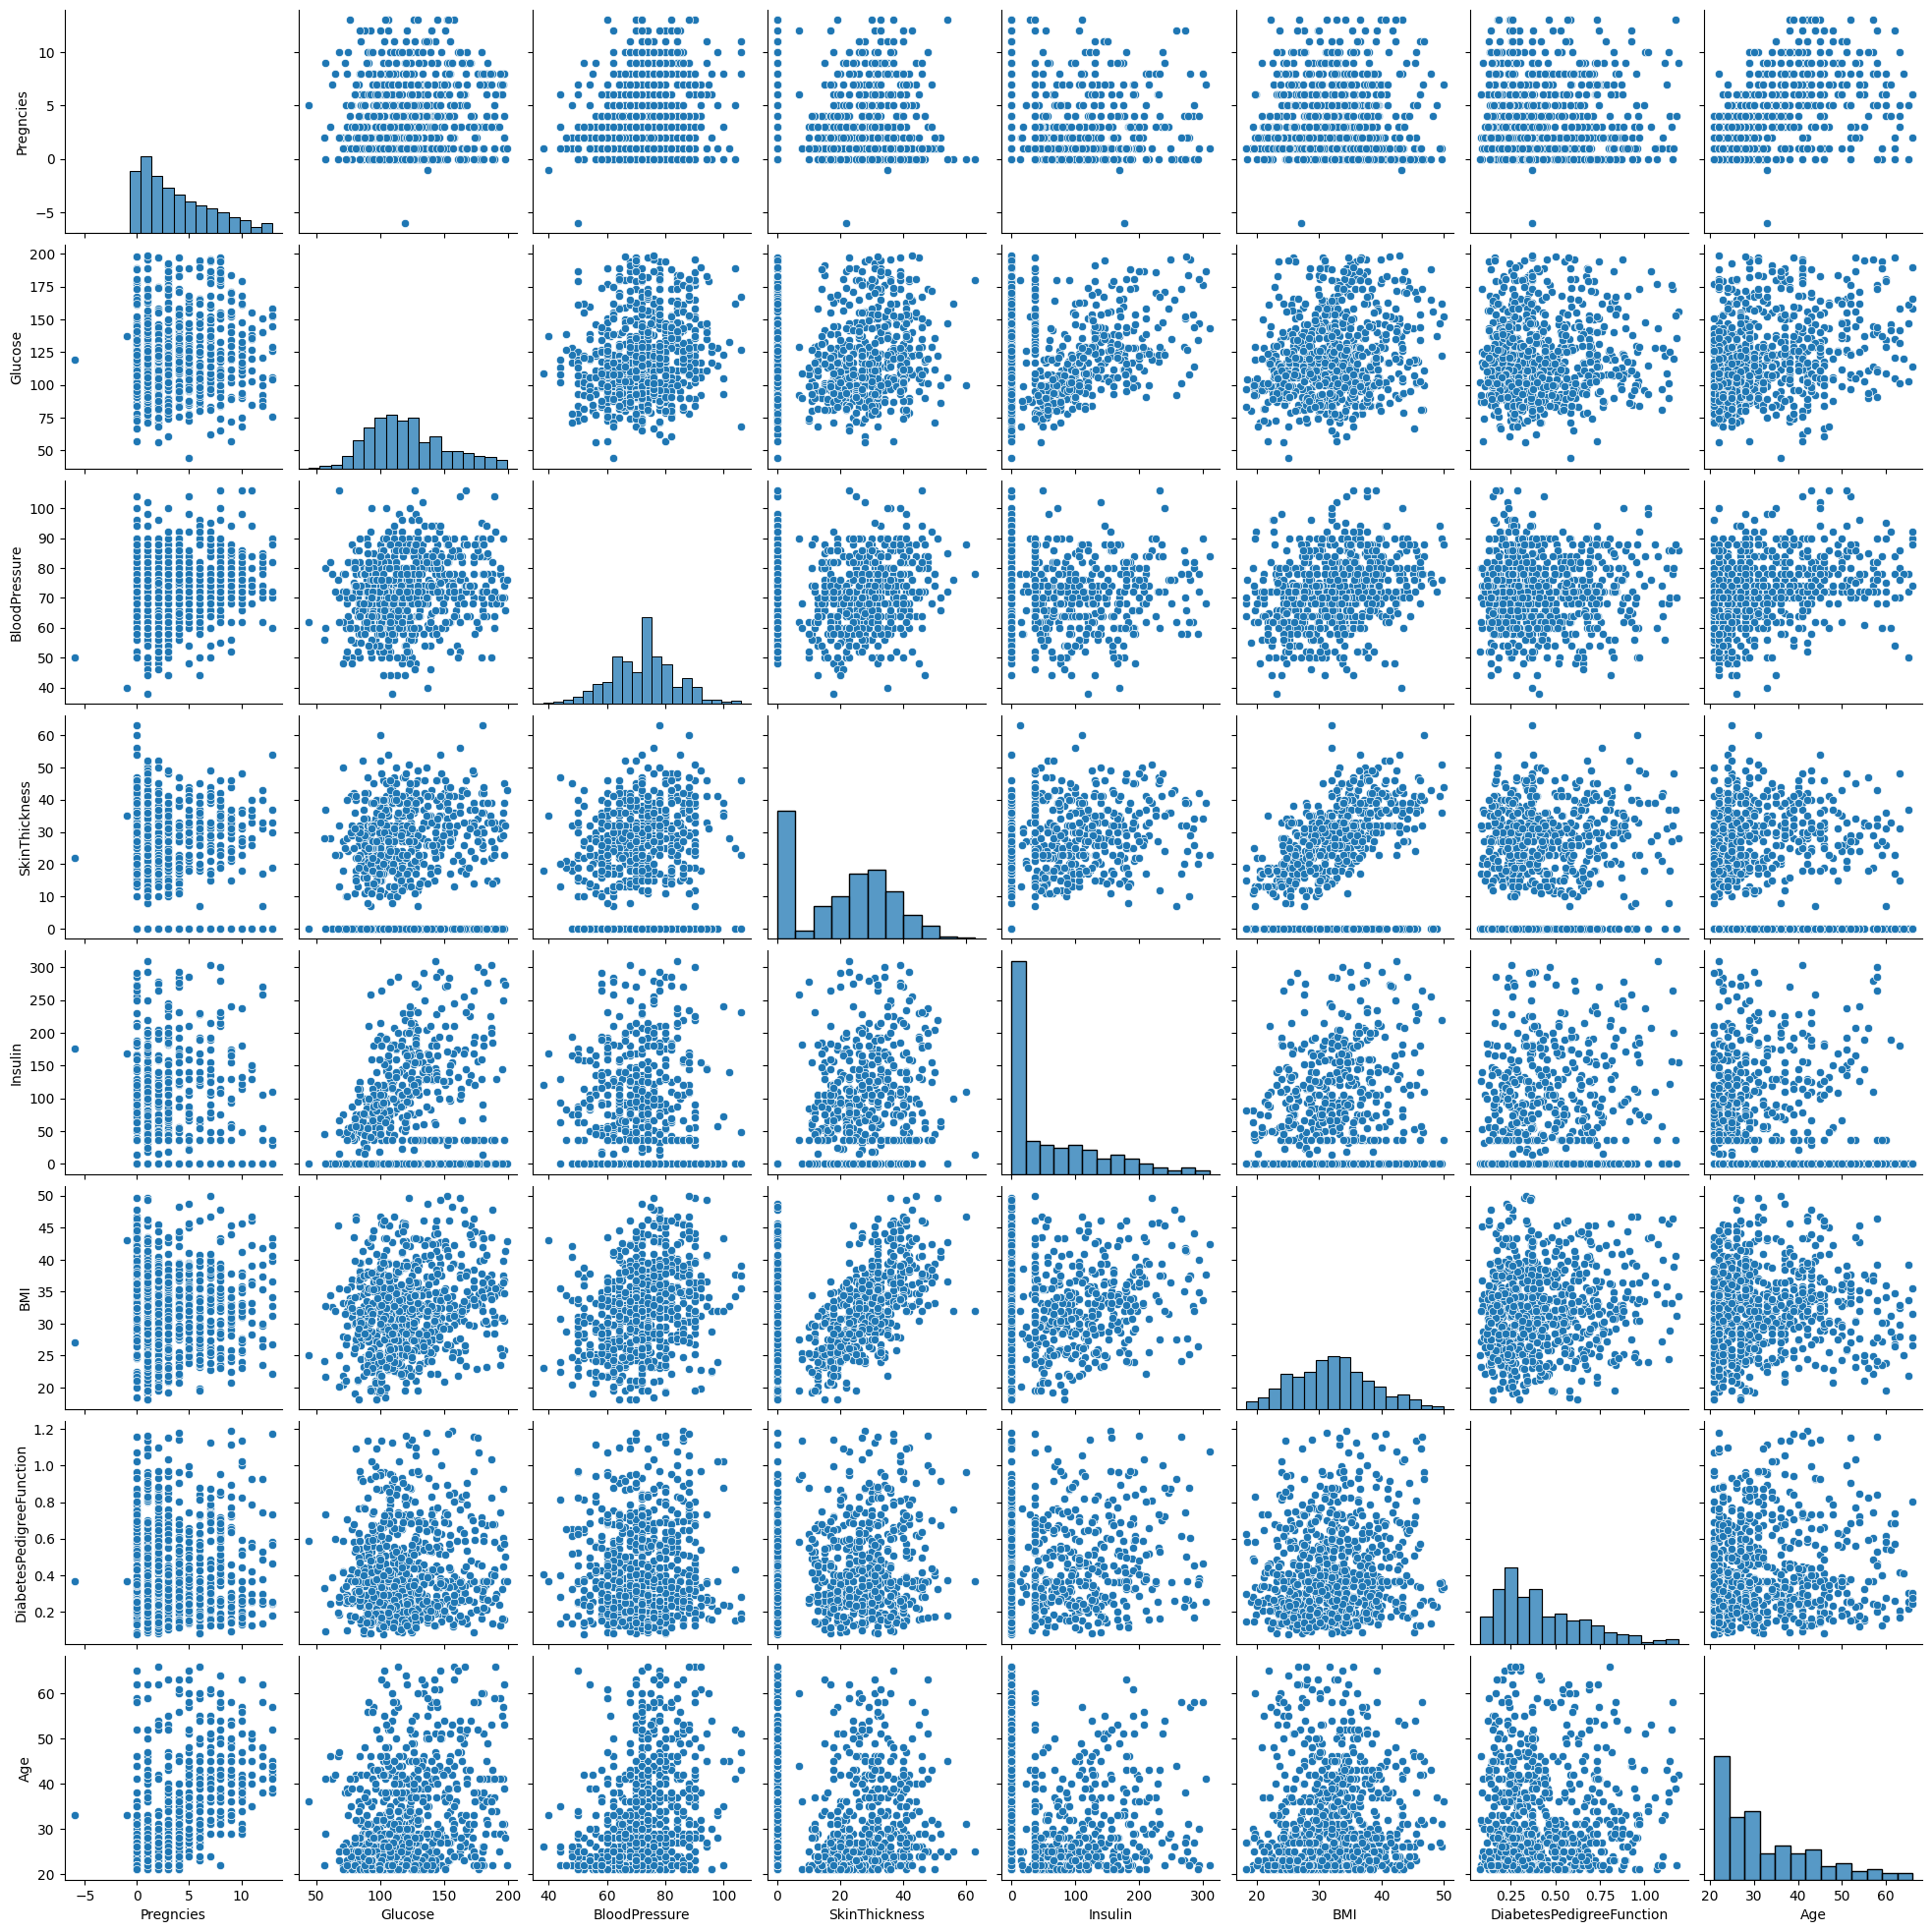

In [12]:
sns.pairplot(pairwise_subset)
plt.show()

In [13]:
cov_sub = pre_processed_dataset.drop(columns=['Patient_ID'])
cov_sub

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,-1.0,137.0,40.0,35.0,168.0,43.1,0.371,33.0,1
...,...,...,...,...,...,...,...,...,...
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0
768,1.0,189.0,60.0,23.0,36.0,30.1,0.398,59.0,1


In [14]:
covariance = cov_sub.cov()
covariance['Outcome']

Pregncies                   0.302118
Glucose                     7.229320
BloodPressure               0.879477
SkinThickness               0.508019
Insulin                     2.717993
BMI                         0.914158
DiabetesPedigreeFunction    0.017347
Age                         1.425138
Outcome                     0.227600
Name: Outcome, dtype: float64

Covariance is a statistical concept that helps us understand the relationship between two variables. It indicates whether two variables change in a similar or opposite direction. A positive covariance means that when one variable increases, the other variable also tends to increase. Conversely, a negative covariance means that when one variable increases, the other variable tends to decrease.

In this dataset, there is a relatively high positive covariance between ***Glucose*** and ***Insulin***, suggesting that they have a strong influence on each other. In fact, they are the two most influential factors in this dataset.